In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\Niklas Winter\Instacart Basket Analysis'

In [3]:
# Importing data set
df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_custs_merged.pkl'))


In [4]:
df_merged.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,...,order_frequency_flag,first_name,last_name,Gender,state,Age,date_joined,no_of_dependents,marital_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620


In [5]:
df_depts = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','departments_wrangled.csv'), index_col = False)

In [8]:
df_merged.dtypes

product_id                  int64
product_name               object
aisle_id                    int64
department_id               int64
prices                    float64
order_id                    int64
user_id                     int64
order_number                int64
order_day_of_week           int64
order_hour_of_day           int64
days_since_prior_order    float64
add_to_cart_order           int64
reordered                   int64
max_order                   int64
loyalty_flag               object
average_price             float64
spending_flag              object
median_prior_orders       float64
order_frequency_flag       object
first_name                 object
last_name                  object
Gender                     object
state                      object
Age                         int64
date_joined                object
no_of_dependents            int64
marital_status             object
income                      int64
dtype: object

## 2. Considering security implications

In [10]:
# Dropping PII information - user names
df_merged = df_merged.drop(columns = ['first_name','last_name'])

In [18]:
df_merged.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,...,median_prior_orders,order_frequency_flag,Gender,state,Age,date_joined,no_of_dependents,marital_status,income,region
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest


# 3. Create regional segmentation

In [11]:
# Checking state column
df_merged['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

### Create regional segmentation of data

In [12]:
# Defining region lists
region_1_NE = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
region_2_MW = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
region_3_S = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
region_4_W = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']


In [14]:
# Assigning region lists values to new column (region)
df_merged.loc[df_merged['state'].isin(region_1_NE), 'region'] = 'Northeast'
df_merged.loc[df_merged['state'].isin(region_2_MW), 'region'] = 'Midwest'
df_merged.loc[df_merged['state'].isin(region_3_S), 'region'] = 'South'
df_merged.loc[df_merged['state'].isin(region_4_W), 'region'] = 'West'

In [15]:
df_merged['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

## Check spending habits of customers by region

In [16]:
# Create crosstab 
crosstab_spending_habits = pd.crosstab (df_merged['spending_flag'], df_merged['region'], dropna = False)

In [17]:
crosstab_spending_habits

region,Midwest,Northeast,South,West
spending_flag,,,,
High spender,156154,108245,210017,160478
Low spender,7441171,5614491,10581868,8132435


# 4. Create exclusion flag for "unprofitable" (< 5 orders) customers

In [19]:
# Create activity flag based on number of orders 
df_merged.loc[df_merged['max_order'] <5, 'activity_flag'] = 'Low activity'
df_merged.loc[df_merged['max_order'] >=5, 'activity_flag'] = 'High activity'


In [21]:
# Checking output
df_merged['activity_flag'].value_counts(dropna = False)

High activity    30964564
Low activity      1440295
Name: activity_flag, dtype: int64

In [37]:
# I received several errors trying to perform the subset below (MemoryError: Unable to allocate" error occurs when the system doesn't have enough memory to allocate for the required operation), so I cut the df
df_merged_cut = df_merged.head(1000000)


In [39]:
# # Create a subset which excludes low_activity customers
high_activity_cxs = df_merged_cut[df_merged_cut['activity_flag'] == 'High activity']

In [35]:
high_activity_cxs.tail()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,...,order_frequency_flag,Gender,state,Age,date_joined,no_of_dependents,marital_status,income,region,activity_flag
999995,24852,Banana,24,4,12.3,2337494,51856,3,4,12,...,Non-frequent customer,Male,Rhode Island,67,3/11/2018,3,married,58218,Northeast,High activity
999996,24852,Banana,24,4,12.3,2632078,51856,5,6,18,...,Non-frequent customer,Male,Rhode Island,67,3/11/2018,3,married,58218,Northeast,High activity
999997,24852,Banana,24,4,12.3,3290385,51856,7,4,19,...,Non-frequent customer,Male,Rhode Island,67,3/11/2018,3,married,58218,Northeast,High activity
999998,24852,Banana,24,4,12.3,542202,51856,9,2,15,...,Non-frequent customer,Male,Rhode Island,67,3/11/2018,3,married,58218,Northeast,High activity
999999,25466,Water,115,7,13.5,3306443,51856,8,6,13,...,Non-frequent customer,Male,Rhode Island,67,3/11/2018,3,married,58218,Northeast,High activity


In [41]:
# Check new df
high_activity_cxs['activity_flag'].value_counts(dropna = False)

High activity    987068
Name: activity_flag, dtype: int64

In [40]:
# Export high_activity_cxs
high_activity_cxs.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_cxs_orders.pkl'))

In [42]:
# Create a subset which excludes High_activity customers
low_activity_cxs = df_merged_cut[df_merged_cut['activity_flag'] == 'Low activity']

In [43]:
# Export low_activity_cxs 
low_activity_cxs.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_cxs_orders.pkl'))


# 5. Create a profiling variable

In [47]:
# Start profiling high activity customers
custs = high_activity_cxs

In [49]:
# # Exploring descriptive statistics of 'age' column
custs['Age'].describe()

count    987068.000000
mean         49.591357
std          18.797093
min          18.000000
25%          33.000000
50%          50.000000
75%          66.000000
max          81.000000
Name: Age, dtype: float64

### Observations: Youngest age: 18

### Grouping age groups
### Youth = 18-33
### Middle Aged = 34-64
### Seniors = >65

In [53]:
# Creating age categories
custs.loc[(custs['Age'] >= 18) & (custs['Age'] < 34), 'age_category'] = 'Youth'

C:\Users\Niklas Winter\AppData\Local\Temp\ipykernel_33084\206379254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  custs.loc[(custs['Age'] >= 18) & (custs['Age'] <= 33), 'age_category'] = 'Youth'


In [54]:
custs.loc[(custs['Age'] >= 34) & (custs['Age'] < 65), 'age_category'] = 'Middle Aged'

In [55]:
custs.loc[custs['Age'] >= 65, 'age_category'] = 'Senior'

In [56]:
custs['age_category'].value_counts()

Middle Aged    472136
Senior         265702
Youth          249230
Name: age_category, dtype: int64

In [59]:
cstmrs.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,...,Gender,state,Age,date_joined,no_of_dependents,marital_status,income,region,activity_flag,age_category
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Senior
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Senior
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Senior
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Senior
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Senior


In [60]:
# Customer profile comparison in regions & departments
crosstab_age_day = pd.crosstab(custs['age_category'], custs['order_day_of_week'], dropna = False)

In [61]:
crosstab_age_day

order_day_of_week,0,1,2,3,4,5,6
age_category,,,,,,,
Middle Aged,75944,89623,62959,60042,60573,65655,57340
Senior,46389,48913,35564,32462,31299,37775,33300
Youth,40607,48132,33650,30997,30634,34781,30429


Text(0.5, 0, 'Age Group')

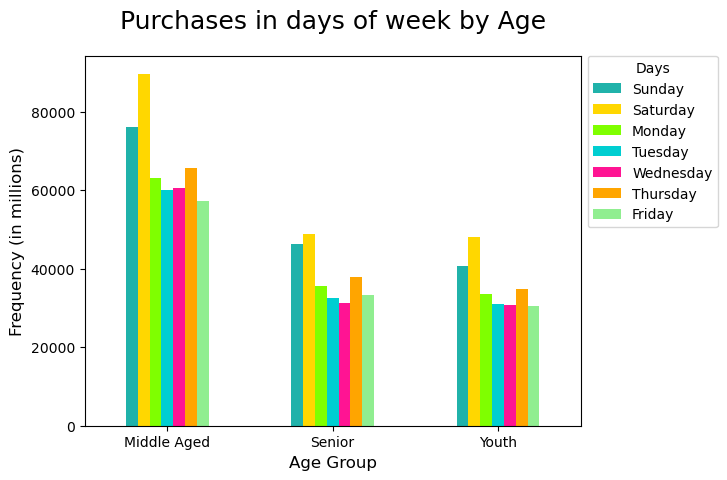

In [69]:
# Visualization of crosstab_age_day
bar_age_day = crosstab_age_day.plot(kind = 'bar', rot = 0, color= ['lightseagreen', 'gold', 'chartreuse', 'darkturquoise', 'deeppink','orange', 'lightgreen'])
bar_age_day.legend(title='Days', bbox_to_anchor=(1, 1.02), loc='upper left', labels=['Sunday', 'Saturday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.title('Purchases in days of week by Age', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Age Group',  fontsize = 12)

In [68]:
# Export
bar_age_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','dow_by_age_groups_barchart.png'), bbox_inches = 'tight')

### Across all 3 Age Groups of Seniors, Middle-Aged & Youth
### Busiest Day = Saturday
### Slowest Day = Wednesday

## Segmenetation based on Instacarts'customers number of dependents & relationship

In [70]:
# Exploring 'number_of_dependents
custs['no_of_dependents'].describe()

count    987068.000000
mean          1.524849
std           1.122510
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           3.000000
Name: no_of_dependents, dtype: float64

### Observations: Min = 0, Max = 3 dependents per Family

### Grouping families by size 
#### small = 0
#### mid Sized = 1-2
#### large = 3

In [74]:
# Creating family_size column
custs.loc[custs['no_of_dependents'] == 0 , 'family_size'] = 'small'
custs.loc[custs['no_of_dependents'].isin([1, 2]), 'family_size'] = 'mid sized'
custs.loc[custs['no_of_dependents'] > 2 , 'family_size'] = 'large'


In [75]:
custs['family_size'].value_counts(dropna = False)

mid sized    488280
large        254279
small        244509
Name: family_size, dtype: int64

In [77]:
custs.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,...,state,Age,date_joined,no_of_dependents,marital_status,income,region,activity_flag,age_category,family_size
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Senior,mid sized
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Senior,mid sized
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Senior,mid sized
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Senior,mid sized
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Senior,mid sized


In [79]:
#Exploring the connection of 'marital_status' and 'no_of_dependents'
family_crosstab = pd.crosstab(custs['marital_status'],custs['no_of_dependents'],dropna = False)

In [80]:
family_crosstab

no_of_dependents,0,1,2,3
marital_status,,,,
divorced/widowed,86800,0,0,0
living with parents and siblings,0,23214,17707,16427
married,0,211053,236306,237852
single,157709,0,0,0


In [84]:
custs.loc[(custs['marital_status'] == 'married') & (custs['no_of_dependents'] == 1), 'household'] = 'Couple Without Children'
custs.loc[(custs['marital_status'] == 'married') & (custs['no_of_dependents'] >= 2), 'household'] = 'Couple With Children'
custs.loc[(custs['marital_status'].isin(['divorced/widowed', 'single'])), 'household'] = 'One Person'
custs.loc[(custs['marital_status'] == 'divorced/widowed') & (custs['no_of_dependents'] > 0), 'household'] = 'Single Parent'
custs.loc[(custs['marital_status'] == 'living with parents and siblings'), 'household'] = 'Other Family'


In [87]:
# Checking new column household
custs['household'].value_counts(dropna = False)

Couple With Children       474158
One Person                 244509
Couple Without Children    211053
Other Family                57348
Name: household, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Couple With Children'),
  Text(1, 0, 'One Person'),
  Text(2, 0, 'Couple Without Children'),
  Text(3, 0, 'Other Family')])

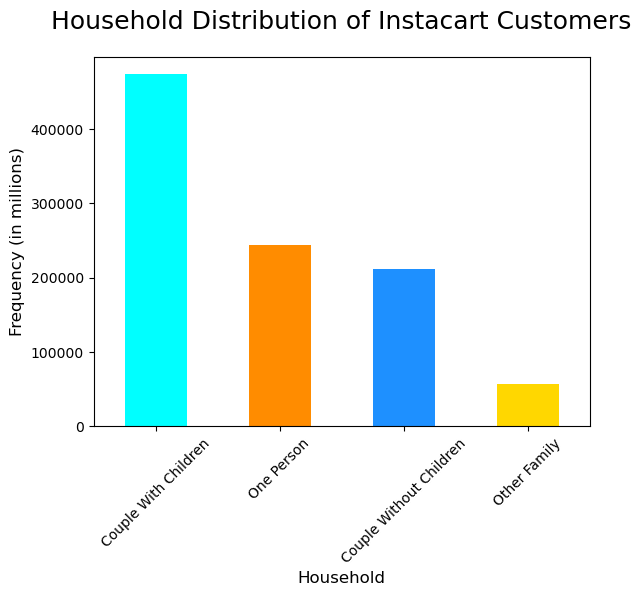

In [88]:
bar_household = custs['household'].value_counts().plot.bar(color= ['aqua', 'darkorange', 'dodgerblue', 'gold'])
plt.title('Household Distribution of Instacart Customers', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Household',  fontsize = 12)
plt.xticks(rotation=45)

In [90]:
# Saving the bar chart
bar_household.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_houshold_stats_barchart.png'), bbox_inches='tight')


### Instacart Customer income

In [91]:
# Exploring income column
custs['income'].describe()

count    987068.000000
mean      96915.495180
std       44603.335747
min       25972.000000
25%       64363.000000
50%       95149.000000
75%      124674.000000
max      576876.000000
Name: income, dtype: float64

### Observations: (Rounded) Min income = 26000, Max income = 577000

### Grouping categories
#### Low = 70000
#### Middle-Class = 70000 - 100000
#### High > 130000

In [93]:
# Creating income category column
custs.loc[custs['income']< 70000, 'income_category'] = 'Low'
custs.loc[(custs['income']>= 70000) & (custs['income']< 100000), 'income_category'] = 'Middle-class'
custs.loc[(custs['income']>= 100000) & (custs['income']< 130000), 'income_category'] = 'Upper-mid-class'
custs.loc[custs['income']>= 130000, 'income_category'] = 'High'

In [94]:
# Checking result of new column income_category
custs['income_category'].value_counts(dropna = False)

Low                295794
Middle-class       258754
Upper-mid-class    217026
High               215494
Name: income_category, dtype: int64

In [95]:
custs.shape

(987068, 32)

In [97]:
sns.color_palette('terrain')

[(0.011764705882352955, 0.5764705882352941, 0.9764705882352941),
 (0.1450980392156863, 0.8290196078431373, 0.42901960784313725),
 (0.7098039215686275, 0.9419607843137255, 0.5419607843137255),
 (0.8549019607843137, 0.8142745098039216, 0.5216470588235294),
 (0.5725490196078431, 0.45286274509803925, 0.36917647058823533),
 (0.7176470588235294, 0.6385882352941177, 0.6216470588235294)]

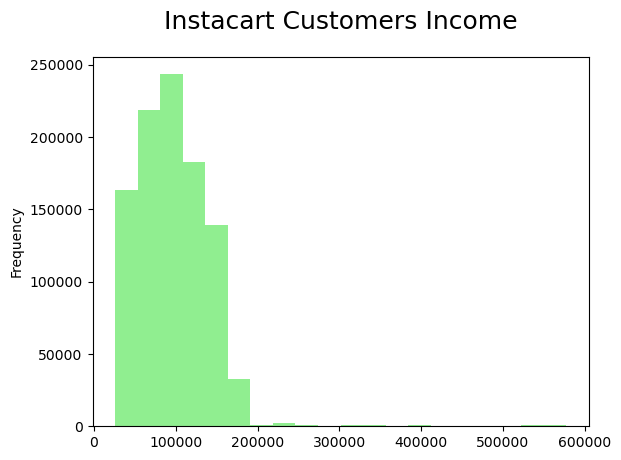

In [99]:
# Create an income histogram
plt.title('Instacart Customers Income', fontsize = 18, pad=20)
hist_inc = cstmrs['income'].plot.hist(bins = 20, color = 'lightgreen')

In [102]:
# Save histogram
hist_inc.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','income_histogram.png'))

## Segmentation by Department

In [103]:
df_depts

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [106]:
df_depts.rename(columns= {"Unnamed: 0": "department_id"}, inplace = True)

In [108]:
# Create dictionary
dprt_map = dict(zip(df_depts["department_id"], df_depts["department"]))


In [109]:
custs['department'] = custs['department_id'].map(dprt_map)

C:\Users\Niklas Winter\AppData\Local\Temp\ipykernel_33084\510762077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  custs['department'] = custs['department_id'].map(dprt_map)


In [111]:
custs.shape

(987068, 33)

In [112]:
# Distribution of 'department' values in 'custs'
custs['department'].value_counts(dropna = False)


produce            258048
dairy eggs         165207
snacks             111369
beverages          105277
frozen              74559
pantry              52138
bakery              33309
deli                31287
canned goods        27547
dry goods pasta     23295
breakfast           22677
meat seafood        21433
household           19275
babies              12825
personal care       11563
international        7117
pets                 2814
alcohol              2741
missing              2450
bulk                 1198
other                 939
Name: department, dtype: int64

## Behavioral Market Segmentation

### Families with Babies

In [114]:
# Creating Has_babies column
custs.loc[custs['department'] == 'babies','Has_babies'] = 'Yes'
custs.loc[custs['department'] != 'babies','Has_babies'] = 'No'

In [115]:
custs['Has_babies'].value_counts(dropna = False)

No     974243
Yes     12825
Name: Has_babies, dtype: int64

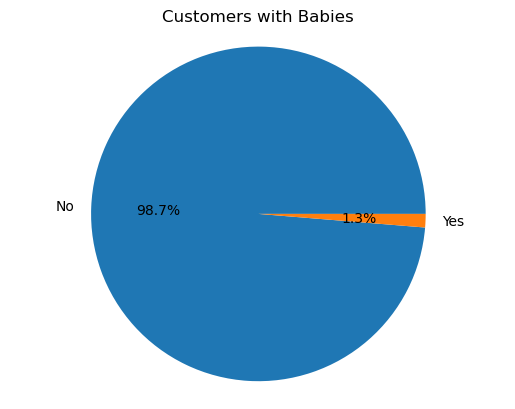

In [116]:
import matplotlib.pyplot as plt

labels = ['No', 'Yes']
sizes = [974243, 12825]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Customers with Babies')

plt.show()


In [117]:
# Save Pie diagram
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations','pie_babies.png'))

<Figure size 640x480 with 0 Axes>

### Income of different regions


In [118]:
# Stacked-bar chart of 'income_category' column in different regions
crosstab_income_region = pd.crosstab (custs['region'],custs['income_category'], dropna = False)
crosstab_income_region

income_category,High,Low,Middle-class,Upper-mid-class
region,,,,
Midwest,42793,67464,53896,50586
Northeast,48411,49801,47867,36714
South,69841,106775,102770,64697
West,54449,71754,54221,65029


In [119]:
# Create customer profiles
# # Create a profile for customers that drink alcohol
custs.loc[custs['department_id'] ==5, 'profile'] = 'Alcohol Drinkers'


C:\Users\Niklas Winter\AppData\Local\Temp\ipykernel_33084\2484616442.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  custs.loc[custs['department_id'] ==5, 'profile'] = 'Alcohol Drinkers'


In [120]:
# Create a profile for customers that eat meat
custs.loc[custs['department_id'] ==11, 'profile'] = 'Meat Eaters'

In [ ]:
# Create a profile for customers that buy snacks
custs.loc[custs['department_id'] ==19, 'profile'] = 'Snackers'

In [122]:
# Create a profile for high income families
custs.loc[(custs['no_of_dependents'] > 1) & (custs['income'] > 128102), 'profile'] = 'High-Income Family'

In [124]:
# Create a profile for average income families
custs.loc[(custs['no_of_dependents'] > 1) & (custs['income'] > 67292) & (custs['income'] < 128102), 'profile'] = 'Average-Income Family'


In [125]:
# Create a profile for low income families
custs.loc[(custs['no_of_dependents'] > 1) & (cstmrs['income'] < 67292), 'profile'] = 'Low-Income Family'

In [127]:
# Create a profile for high income single adults without children
custs.loc[(custs['marital_status'] == 'single') & (custs['no_of_dependents'] == 0) & (custs['income'] > 128102), 'profile'] = 'Rich Single Adult'


In [129]:
# Income of Retired
custs.loc[(custs['income'] > 128102) & (custs['Age'] > 65),'profile'] ='Rich Retired'

In [130]:
# Create a profile for average retired 
custs.loc[(custs['income'] > 67292) & (custs['income'] < 128102) & (custs['Age'] < 65), 'profile'] = 'Average Retired'

In [131]:
# Create a profile for poor retired
custs.loc[(custs['income'] < 67292) & (custs['Age'] > 65),'profile'] ='Poor Retired'

In [133]:
# Create a profile for pet owners
custs.loc[custs['department_id'] ==8, 'profile'] = 'Pet Owners'

In [134]:
custs['profile'].value_counts(dropna = False)

Average Retired          362925
NaN                      216206
Low-Income Family        122751
Rich Retired              93470
Average-Income Family     62612
High-Income Family        59994
Poor Retired              33501
Rich Single Adult         29671
Pet Owners                 2814
Meat Eaters                2442
Alcohol Drinkers            682
Name: profile, dtype: int64

In [137]:
# Fill NaN as 'Others'
custs['profile'] = custs['profile'].fillna('Others')

C:\Users\Niklas Winter\AppData\Local\Temp\ipykernel_33084\3396015469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  custs['profile'] = custs['profile'].fillna('Others')


In [136]:
custs['profile'].value_counts(dropna = False)

Average Retired          362925
Other                    216206
Low-Income Family        122751
Rich Retired              93470
Average-Income Family     62612
High-Income Family        59994
Poor Retired              33501
Rich Single Adult         29671
Pet Owners                 2814
Meat Eaters                2442
Alcohol Drinkers            682
Name: profile, dtype: int64

Text(0.5, 0, 'Customer Profiles')

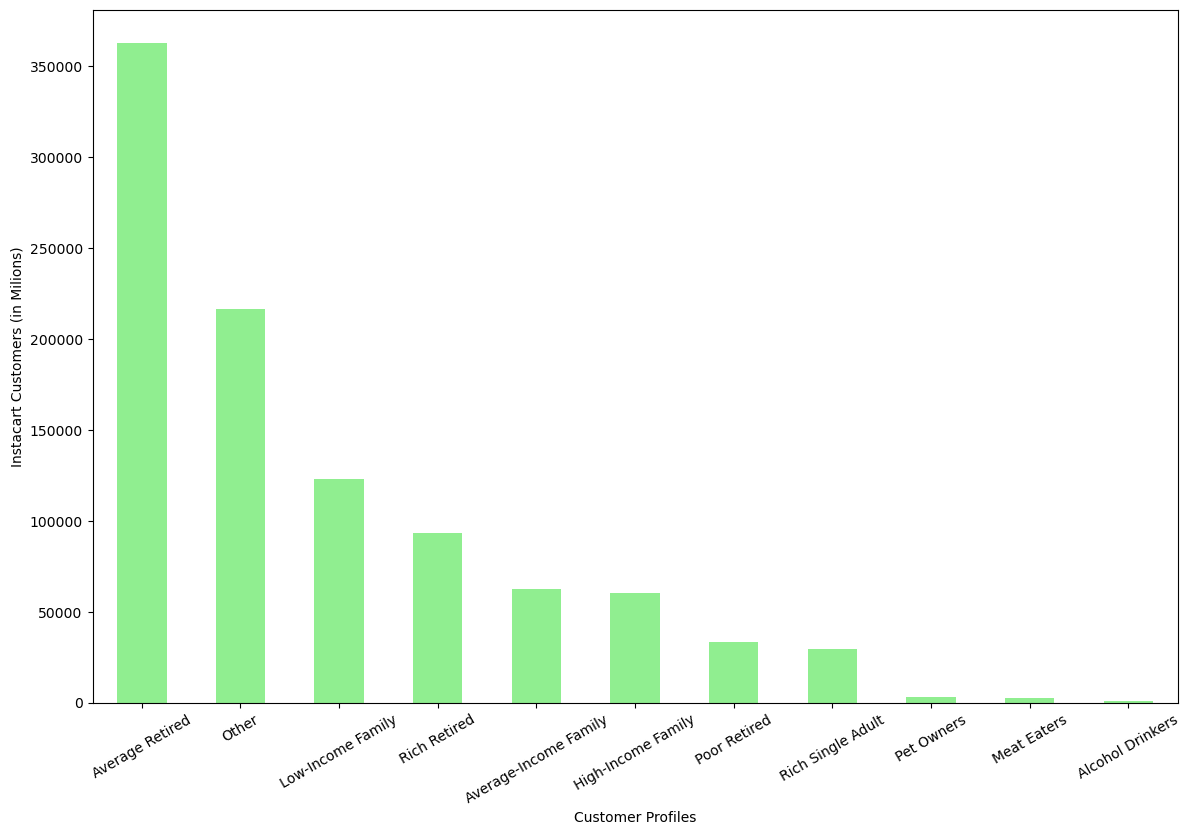

In [140]:
# Create Bar chart
bar = custs['profile'].value_counts().plot.bar(rot=30, figsize = (14,9), color = 'lightgreen')
plt.ylabel ('Instacart Customers (in Milions)')
plt.xlabel ('Customer Profiles')

In [141]:
# Saving the bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','customer_profiles_barchart.png'),bbox_inches = 'tight')

# 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [142]:
# Comparing the Max, Min & Mean Values
custs.groupby('profile').agg({'prices': ['max','min','mean'], 'days_since_prior_order':['mean', 'min','max']})

prices                 days_since_prior_order       \
                           max  min       mean                   mean  min   
profile                                                                      
Alcohol Drinkers          15.0  1.0   9.408798               8.487506  0.0   
Average Retired        99999.0  1.0   8.500599               9.672617  0.0   
Average-Income Family  14900.0  1.0   9.537336               9.418036  0.0   
High-Income Family     99999.0  1.0  19.211381               9.762491  0.0   
Low-Income Family         25.0  1.0   7.198551               9.476047  0.0   
Meat Eaters               15.0  1.0   7.922973               9.692536  0.0   
Other                  99999.0  1.0   9.327051               9.291161  0.0   
Pet Owners                15.0  1.1   7.966382               9.738193  0.0   
Poor Retired              25.0  1.0   6.574093               9.510875  0.0   
Rich Retired           99999.0  1.0  15.438267               9.624405  0.0   
Rich Single Adult      99999.0  1.0  26.041482               9.307038  0.0   

                             
                        max  
profile                      
Alcohol Drinkers       30.0  
Average Retired        30.0  
Average-Income Family  30.0  
High-Income Family     30.0  
Low-Income Family      30.0  
Meat Eaters            30.0  
Other                  30.0  
Pet Owners             30.0  
Poor Retired           30.0  
Rich Retired           30.0  
Rich Single Adult      30.0

# 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [144]:
# Comparing customer profiles & regions
crosstab_3 = pd.crosstab(custs['profile'], custs['region'], dropna = False)
crosstab_3

region,Midwest,Northeast,South,West
profile,,,,
Alcohol Drinkers,35,104,408,135
Average Retired,83407,65986,123285,90247
Average-Income Family,10096,11829,23968,16719
High-Income Family,9323,17675,15962,17034
Low-Income Family,26889,24770,42671,28421
Meat Eaters,555,382,915,590
Other,48982,33846,81214,52164
Pet Owners,981,330,932,571
Poor Retired,8970,4760,11005,8766


In [146]:
# Comparing customer profiles & departments
crosstab_4 = pd.crosstab(custs['profile'], custs['department_id'], dropna = False)
crosstab_4

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
profile,,,,,,,,,,,,,,,,,,,,,
Alcohol Drinkers,0,0,0,0,682,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Average Retired,28043,338,13292,98170,691,2790,36812,0,8928,401,...,8719,19926,7947,11106,65166,6592,5390,31594,11912,874
Average-Income Family,5181,49,2297,16795,65,451,6403,0,1596,51,...,1642,3241,1223,2048,10442,1298,998,5937,1990,199
High-Income Family,4666,61,2035,16377,437,505,5968,0,1568,50,...,1628,3608,1184,1583,11016,1158,990,4443,1620,127
Low-Income Family,8899,124,3931,29258,344,668,14972,0,2308,208,...,1817,5683,3417,2817,18264,2452,1201,21635,3257,253
Meat Eaters,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Other,15835,179,6454,58092,0,1594,22930,0,5198,325,...,4265,11564,5049,5801,35550,4499,2512,28150,7605,604
Pet Owners,0,0,0,0,0,0,0,2814,0,0,...,0,0,0,0,0,0,0,0,0,0
Poor Retired,2326,30,861,6847,62,152,4830,0,431,88,...,281,1274,1242,508,4630,623,67,7785,1039,82


([<matplotlib.axis.XTick at 0x20d1ba3ad00>,
 [Text(0, 0, 'Snackers'),
  Text(1, 0, 'Rich Single Adult'),
  Text(2, 0, 'High-Income Family'),
  Text(3, 0, 'Average-Income Family'),
  Text(4, 0, 'Low-Income Family'),
  Text(5, 0, 'Rich Retired'),
  Text(6, 0, 'Average Retired'),
  Text(7, 0, 'Poor Retired'),
  Text(8, 0, 'Has Babies'),
  Text(9, 0, 'Meat Eaters'),
  Text(10, 0, 'other')])

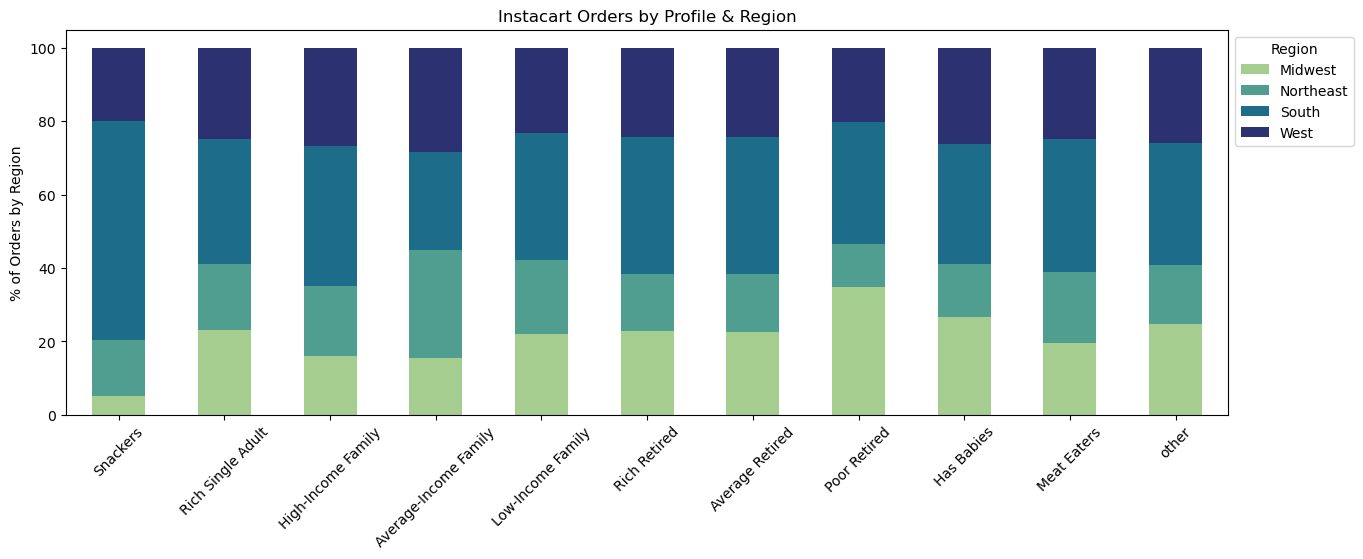

In [153]:
# Creating a stacked barchart of customer profile by region
bar_region_prof = crosstab_3.loc[:,['Midwest','Northeast','South','West']].apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True, rot=45, figsize=(15,5), colormap='crest').legend(title="Region", bbox_to_anchor=(1.0,1.0))
plt.xlabel('')
plt.ylabel('% of Orders by Region')
plt.title ('Instacart Orders by Profile & Region')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10],['Snackers','Rich Single Adult','High-Income Family','Average-Income Family','Low-Income Family','Rich Retired','Average Retired','Poor Retired','Has Babies','Meat Eaters','other'])

#### Observation: Highest % of orders by region is in The South; Marketing team should focus on advertising to their clients in the Northeast


In [154]:
# Export
bar_region_prof.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','region_profiles_barchart.png'), bbox_inches = 'tight')

In [156]:
# Create crosstab by region with loyalty flag
crosstab_5 = pd.crosstab(df_merged['region'], df_merged['loyalty_flag'], dropna = False)
crosstab_5


loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2373774,1472573,3750978
Northeast,1841785,1100207,2780744
South,3405844,2074410,5311631
West,2662690,1596800,4033423


Text(0.5, 1.0, 'Loyal Customers by Region')

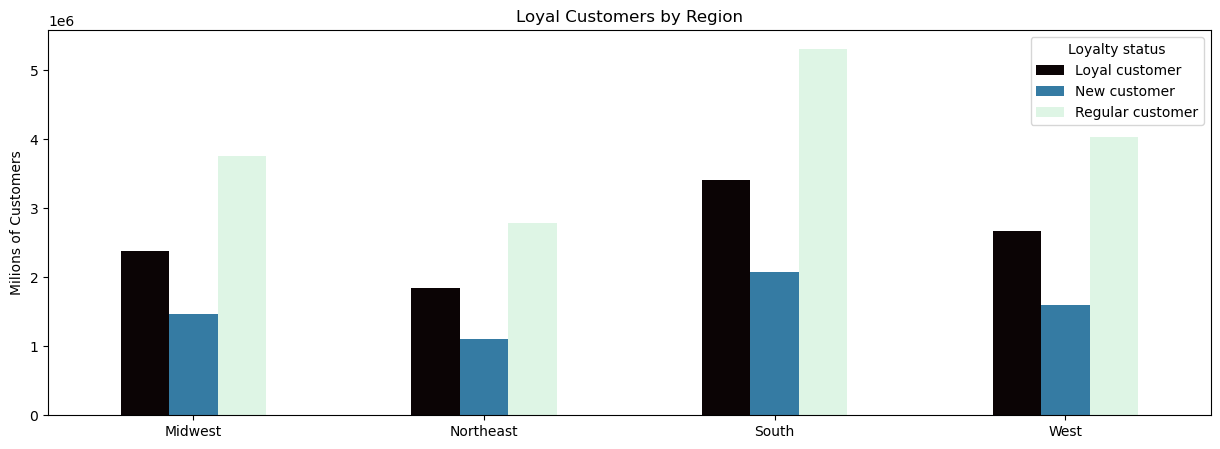

In [157]:
# Create barchart from crosstab
bar_loyalty_region = crosstab_5.iloc[:,[0,1,2]].plot.bar(rot=0, figsize=(15,5), colormap='mako').legend(title='Loyalty status', bbox_to_anchor=(1.0,1.0))
plt.xlabel('')
plt.ylabel('Milions of Customers')
plt.title ('Loyal Customers by Region')

In [158]:
#exporting the file
bar_loyalty_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','loyalty_region_barchart.png'))

In [159]:
# creating a crosstab of region and spending-flag
crosstab_6 = pd.crosstab(custs['region'], custs['spending_flag'], dropna = False)

Text(0.5, 1.0, 'Spending by Region')

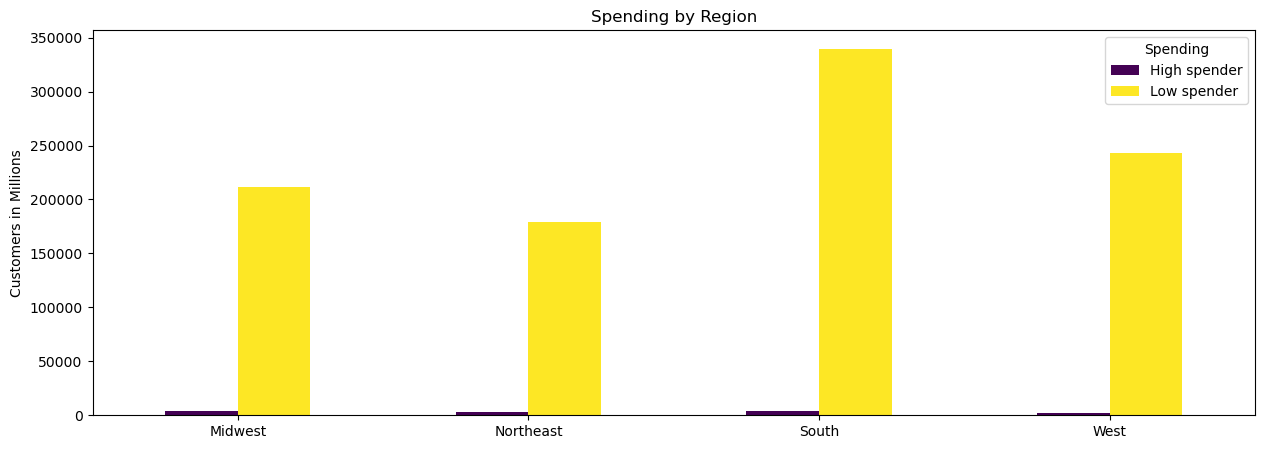

In [160]:
# creating a barchart from the crosstab
bar_spending_region = crosstab_6.plot.bar(rot=0, figsize=(15,5), colormap='viridis').legend(title='Spending')
plt.xlabel('')
plt.ylabel('Customers in Millions')
plt.title ('Spending by Region')


In [161]:
# Export file
bar_spending_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','spending_region_barchart.png'))

In [187]:
# Create a crosstab between department_id and loyalty_flag
crosstab_7 = pd.crosstab(filtered_custs['department_id'], custs['loyalty_flag'], dropna = False)
crosstab_7

loyalty_flag,Loyal customer,New customer,Regular customer
department_id,,,
1,27372,6609,40578
2,360,91,488
3,15538,2301,15470
4,122995,15817,119236
5,1275,251,1215
6,2930,496,3691
7,51012,6855,47410
8,1227,214,1373
9,8923,1914,12458


Text(0.5, 1.0, 'Orders by Department & Loyalty Status')

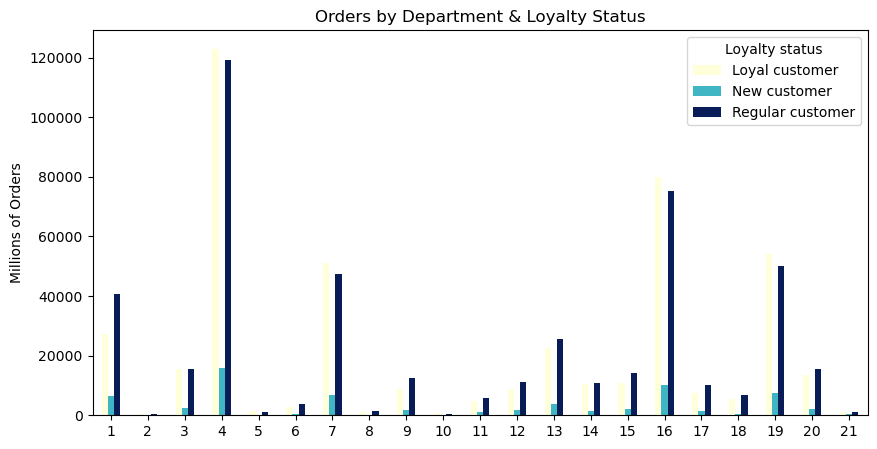

In [180]:
bar_department_loyalty = crosstab_7.plot.bar(rot=0, figsize=(10,5), colormap='YlGnBu').legend(title='Loyalty status')
plt.xlabel('')
plt.ylabel('Millions of Orders')
plt.title ('Orders by Department & Loyalty Status')


In [181]:
# Export file 
bar_department_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','department_loyalty.png'), bbox_inches = 'tight')

In [184]:
# Create a histogram of prices and order frequency
# Create a boolean mask to filter out values > 150
mask = custs['prices'] <= 150
filtered_custs = custs[mask]

Text(0.5, 1.0, 'Product Prices')

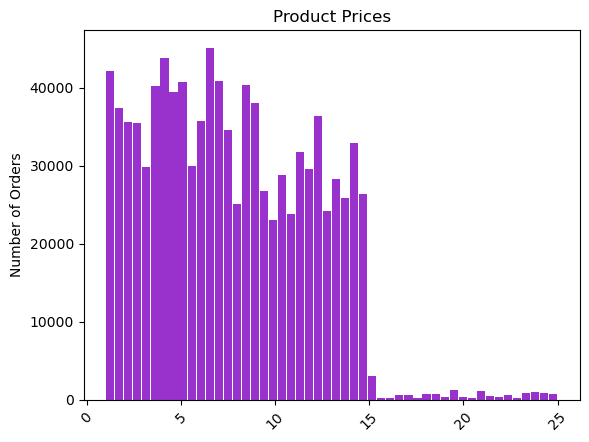

In [192]:
# Create a histogram 
hist_price_frequency =filtered_custs['prices'].plot.hist(bins = 50,rot = 45, color = 'darkorchid', rwidth = 0.9)
plt.xlabel('')
plt.ylabel('Number of Orders')
plt.title ('Product Prices')

In [193]:
hist_price_frequency.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','hist_prices.png'))

In [194]:
# Department category expenditure aggregation
custs.groupby('department').agg({'prices' : ['mean', 'min', 'max']})

prices              
                      mean  min      max
department                              
alcohol           8.595914  1.0     15.0
babies            7.537154  1.1     15.0
bakery            7.864265  1.0     15.0
beverages         7.568330  1.0     15.0
breakfast         7.859025  1.0     14.9
bulk              7.522705  4.5     14.1
canned goods      7.629687  1.0     15.0
dairy eggs       24.407276  1.0  99999.0
deli              7.751469  1.0     15.0
dry goods pasta   7.399223  1.0     15.0
frozen            7.802308  1.0     15.0
household         7.340389  1.0     15.0
international     7.728031  1.0     15.0
meat seafood     15.999375  8.0     25.0
missing           8.241020  1.1     15.0
other             6.835676  1.1     14.8
pantry            8.000361  1.0     20.0
personal care     8.137188  1.0     15.0
pets              7.966382  1.1     15.0
produce           7.895986  1.0     15.0
snacks            4.280341  1.6      7.0

In [197]:
# Age category usage frequency aggregation
custs.groupby('age_category').agg({'add_to_cart_order': ['mean', 'min', 'max']})

add_to_cart_order        
                          mean min max
age_category                          
Middle Aged           9.505564   1  91
Senior                9.188900   1  72
Youth                 9.289267   1  73

In [198]:
# Region expenditure aggregation
custs.groupby('region').agg({'prices': ['mean', 'min', 'max']})

prices              
                mean  min      max
region                            
Midwest    10.672599  1.0  99999.0
Northeast  10.096950  1.0  99999.0
South      11.011925  1.0  99999.0
West        9.340338  1.0  14900.0

In [199]:
# Household usage frequency aggregation
custs.groupby('household').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order        
                                     mean min max
household                                        
Couple With Children             9.526297   1  84
Couple Without Children          8.930136   1  84
One Person                       9.346846   1  91
Other Family                     9.721385   1  57

In [200]:
# Income category expenditure aggregation
custs.groupby('income_category').agg({'prices' : ['mean', 'min', 'max']})

prices              
                      mean  min      max
income_category                         
High             18.085391  1.0  99999.0
Low               7.163370  1.0     25.0
Middle-class      9.046293  1.0  99999.0
Upper-mid-class   8.580380  1.0  14900.0

In [201]:
high_activity_cxs

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,...,income,region,activity_flag,age_category,family_size,household,income_category,department,Has_babies,profile
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,49620,Midwest,High activity,Senior,mid sized,Couple Without Children,Low,snacks,No,Poor Retired
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,49620,Midwest,High activity,Senior,mid sized,Couple Without Children,Low,snacks,No,Poor Retired
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,49620,Midwest,High activity,Senior,mid sized,Couple Without Children,Low,meat seafood,No,Poor Retired
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,49620,Midwest,High activity,Senior,mid sized,Couple Without Children,Low,meat seafood,No,Poor Retired
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,49620,Midwest,High activity,Senior,mid sized,Couple Without Children,Low,bulk,No,Poor Retired
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,24852,Banana,24,4,12.3,2337494,51856,3,4,12,...,58218,Northeast,High activity,Senior,large,Couple With Children,Low,produce,No,Poor Retired
999996,24852,Banana,24,4,12.3,2632078,51856,5,6,18,...,58218,Northeast,High activity,Senior,large,Couple With Children,Low,produce,No,Poor Retired
999997,24852,Banana,24,4,12.3,3290385,51856,7,4,19,...,58218,Northeast,High activity,Senior,large,Couple With Children,Low,produce,No,Poor Retired
999998,24852,Banana,24,4,12.3,542202,51856,9,2,15,...,58218,Northeast,High activity,Senior,large,Couple With Children,Low,produce,No,Poor Retired


In [202]:
# Export high_activity_cxs in .pkl format
high_activity_cxs.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_cxs_orders.pkl'))

In [203]:
# Export low_activity_cxs in .pkl format
low_activity_cxs.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_cxs_orders.pkl'))

In [204]:
# Export df custs
custs.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'custs.pkl'))

In [ ]:
# Export df merged
df_merged.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Final_dataset_merged.pkl'))